# Faktor Apakah yang Menjual Sebuah Mobil?


## Pendahuluan
Proyek kali ini bertujuan untuk mempelajari kumpulan data selama beberapa tahun terakhir dari ratusan iklan kendaraan gratis yang ditayangkan di situs web Crankshaft List setiap hari, dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

### Tujuan: 
Menganalisa dan menentukan faktor yang paling memengaruhi harga kendaraan, berdasarkan lima parameter yaitu :
1. Usia kendaraan
2. Jarak tempuh kendaraan
3. Kondisi kendaraan
4. Tipe transmisi kendaraan
5. Warna kendaraan

### Tahapan:
Proyek ini akan terdiri dari tiga tahap utama, yaitu:
1. Ikhtisar Data : Membaca file dan melakukan eksplorasi data
2. Pra-pemrosesan data : 
- Mengidentifikasi dan mengisi nilai-nilai yang hilang
- Memperbaiki tipe data
- Memperbaiki kualitas data
3. Analisis Data Eksploratif :
- Mempelajari parameter inti
- Mempelajari dan menangani Outlier
- Mempelajari parameter inti tanpa Outlier
- Memeriksa harga rata-rata kendaraan dengan jumlah iklan terbanyak
- Menganalisa dan menentukan faktor yang paling memengaruhi harga kendaraan

## Pra-pemrosesan

Memuat semua *library* yang dibutuhkan.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


### Memuat Data

Memuat data proyek untuk membaca informasi umumnya.

In [7]:
try :
    df = pd.read_csv('vehicles_us.csv')
    
except :
    df = pd.read_csv('/datasets/vehicles_us.csv')

### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [9]:
df.shape

(51525, 13)

In [10]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [11]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [12]:
df.duplicated().sum()

0

Pada informasi umum dan sampel data yang ditampilkan, terdapat beberapa masalah seperti nilai yang hilang dibeberapa kolom, dan juga kolom `date_posted` nilainya tidak berupa data tanggal melainkan string, serta kolom `model_year` dan `is_4wd` nilainya berupa desimal, yang seharusnya bilangan bulat. Untuk memperbaiki masalah ini diperlukan penyelidikan dan perubahan lebih lanjut. Sedangkan untuk nilai duplikat, tidak ditemukan adanya duplikat data.

In [13]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [14]:
columns = ['model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd']

for column in columns:
    mis_value = df[column].isna().mean() * 100
    print("Persentase nilai hilang di kolom '{}': {:.2f}%".format(column, mis_value))

Persentase nilai hilang di kolom 'model_year': 7.02%
Persentase nilai hilang di kolom 'cylinders': 10.21%
Persentase nilai hilang di kolom 'odometer': 15.32%
Persentase nilai hilang di kolom 'paint_color': 17.99%
Persentase nilai hilang di kolom 'is_4wd': 50.37%


Terdapat nilai yang hilang di lima kolom yang berbeda. Jumlah nilai yang hilang disetiap kolom tersebut pun beragam (tidak simetris). Kolom yang berisi paling banyak nilai yang hilang adalah kolom `is_4wd`, dengan presentase nilai  hilang 50.37% dari jumlah total baris. Sedangkan empat kolom lainnya, memiliki jumlah nilai yang hilang dibawah 20% dari total baris, dengan distribusi tipe data: satu kolom merupakan kolom kategorik, dan tiga lainnya merupakan kolom numerik.

### Kesimpulan dan Langkah-Langkah Selanjutnya

Kesimpulan yang dapat diambil dari data awal yaitu, ada beberapa kolom yang tipe datanya berbeda dengan tipe data yang seharusnya. Serta terdapat juga nilai yang hilang di lima kolom yang berbeda, dengan jumlah nilai yang hilang tidak simetris, dan juga tipe data dari lima kolom ini berbeda. 
Agar lebih sesuai untuk analisis yang diperlukan, kolom dengan data yang tidak sesuai : `date_posted`, `model_year`, dan `is_4wd` perlu diperbaiki. Namun, sebelum itu kolom dengan nilai yang hilang perlu diaatasi terlebih dahulu untuk mempermudah proses selanjutnya.

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

### Memeriksa kolom `model_year` untuk menangani nilai yang hilang

Memeriksa distribusi nilai yang hilang dengan mengelompokan berdasarkan lima kolom lain yang memiliki jumlah nilai unique sedikit, agar mempermudah melihat distribusi nilai hilang, serta menemukan polanya (jika ada).   

In [15]:
columns_to_check = ['condition', 'cylinders', 'fuel', 'transmission', 'type']

for column in columns_to_check:
    total_na = df[df['model_year'].isna()].value_counts(column)
    
    print(column, total_na)

condition condition
excellent    1699
good         1450
like new      333
fair          115
salvage        12
new            10
dtype: int64
cylinders cylinders
8.0     1139
6.0     1052
4.0     1008
10.0      32
5.0       24
3.0        1
dtype: int64
fuel fuel
gas       3301
diesel     274
hybrid      38
other        6
dtype: int64
transmission transmission
automatic    3310
manual        187
other         122
dtype: int64
type type
SUV            919
sedan          848
truck          836
pickup         504
coupe          145
wagon          110
mini-van        86
hatchback       73
van             39
convertible     27
other           22
offroad         10
dtype: int64


Dari distribusi diatas tidak ditemukan adanya pola dari nilai yang hilang. Pengelompokan berdasarkan kolom `fuel` dan `transmission` memiliki kemiripan, namun jumlah nilainya tidak simetris. Dapat disimpulkan nilai hilang secara acak. 
Maka dari itu, nilai yang hilang akan diisi oleh nilai mean atau median dari kolom ini, mengingat kolom `model_year` akan dibutuhkan untuk proses analisa lebih lanjut, penting untuk menangani nilai yang hilang.

Membuat table data tanpa nilai yang hilang, untuk menghitung nilai mean dan median dari table ini.

In [16]:
df_clean = df.dropna().reset_index(drop=True)
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14852 entries, 0 to 14851
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         14852 non-null  int64  
 1   model_year    14852 non-null  float64
 2   model         14852 non-null  object 
 3   condition     14852 non-null  object 
 4   cylinders     14852 non-null  float64
 5   fuel          14852 non-null  object 
 6   odometer      14852 non-null  float64
 7   transmission  14852 non-null  object 
 8   type          14852 non-null  object 
 9   paint_color   14852 non-null  object 
 10  is_4wd        14852 non-null  float64
 11  date_posted   14852 non-null  object 
 12  days_listed   14852 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 1.5+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
1,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
2,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38
3,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24
4,14990,2010.0,ram 1500,excellent,8.0,gas,130725.0,automatic,pickup,red,1.0,2018-12-30,13


In [17]:
df_grouped = df_clean.groupby(['type', 'model']).agg(
    {'model_year': ['mean', 'median']}) 

df_grouped

model_year        
                                  mean  median
type  model                                   
SUV   bmw x5               2008.937500  2010.0
      buick enclave        2012.060976  2012.0
      cadillac escalade    2009.097744  2009.0
      chevrolet equinox    2013.203947  2014.0
      chevrolet silverado  2004.166667  2011.0
...                                ...     ...
wagon subaru outback       2008.732394  2009.0
      toyota 4runner       2008.000000  2005.0
      toyota highlander    2012.000000  2012.0
      toyota rav4          2003.000000  2003.0
      volkswagen passat    2003.000000  2003.0

[264 rows x 2 columns]

Mengingat tahun mobil dapat ditemukan berdasarkan tipe dan model mobil itu sendiri, penghitungan nilai mean dan median diatas dilakukan berdasarkan pengelompokan tipe mobil (kolom `type`) dan model mobil (kolom `model`), dengan tabel data tanpa nilai yang hilang yang telah dibuat sebelumnya. Karena nilai mean dan median yang dihasilkan terdapat perbedaan dibeberapa tipe dan jenis mobil, nilai median akan digunakan untuk mengisi nilai yang hilang. 

In [18]:
def fillna_model_yr(df):
    
    median_by_type_model = df_clean.groupby(['type', 'model'])['model_year'].median()

    for (type, model), median in median_by_type_model.items():
        df.loc[(df['type'] == type) & (df['model'] == model) & (df['model_year'].isnull()), 'model_year'] = median

    return df

df = fillna_model_yr(df)
df['model_year'].isna().sum()

365

In [19]:
df[df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN,2018-09-15,1
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
383,9500,NaN,nissan maxima,like new,6.0,gas,105000.0,automatic,sedan,white,NaN,2018-08-10,42
429,8950,NaN,ford focus se,excellent,4.0,gas,63380.0,automatic,sedan,white,NaN,2018-08-08,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50255,15000,NaN,dodge grand caravan,excellent,6.0,gas,63670.0,automatic,SUV,white,NaN,2018-11-06,82
51172,9975,NaN,ford focus,good,4.0,gas,64673.0,automatic,hatchback,silver,NaN,2018-10-28,39
51292,1600,NaN,honda civic,good,4.0,gas,250000.0,automatic,coupe,silver,NaN,2018-11-26,19
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,NaN,2019-03-16,83


Masih terdapat 365 nilai hilang hilang pada kolom ini, yang disebabkan oleh hanya terdapat masing-masing satu baris dari nilai Nan yang telah dikelompokan berdasarkan tipe dan model mobil, serta hanya nilai Nan yang ada pada kolom ini setelah melalui pengkategorian berdasarkan dua kolom.
Untuk menangani ini, sisa nilai yang hilang akan diisi berdasarkan median dari kolom `type` saja. 

In [20]:
def leftfillna_model_year(df):
    
    median_by_model = df_clean.groupby('type')['model_year'].median()

    for (type), median in median_by_model.items():
        df.loc[(df['type'] == type) & (df['model_year'].isnull()), 'model_year'] = median

    return df

df = leftfillna_model_year(df)
df['model_year'].isna().sum()

0

### Memeriksa kolom `cylinders` untuk menangani nilai yang hilang

Jumlah silinder pada mobil dapat ditemukan dari jenis mobilnya. Oleh karena itu, penting memeriksa distribusi nilai yang hilang pada kolom `type` dan kolom `transmission`. 

In [21]:
columns_to_check = ['transmission', 'type']

for column in columns_to_check:
    total_na = df[df['cylinders'].isna()].value_counts(column)
    
    print(column, total_na)

transmission transmission
automatic    4782
manual        306
other         172
dtype: int64
type type
truck          1265
sedan          1256
SUV            1224
pickup          714
coupe           222
wagon           164
hatchback       130
mini-van        127
van              65
convertible      36
other            31
offroad          22
bus               4
dtype: int64


Karena tidak ditemukan adanya pola dari nilai yang hilang di kolom `cylinders`, nilai yang hilang akan diisi dengan nilai mean/median yang dikelompokan berdasarkan kolom `type` dan kolom `transmission`. Sama seperti sebelumnya, nilai median akan digunakan apabila ditemukan perbedaan yang signifikan dari hasil perhitungan mean dan median.

In [22]:
df_grouped = df_clean.groupby(['type', 'transmission']).agg(
    {'cylinders': ['mean', 'median']}) 

df_grouped

cylinders       
                               mean median
type        transmission                  
SUV         automatic      6.009753    6.0
            manual         5.560000    6.0
            other          7.696203    6.0
convertible automatic      6.000000    6.0
            manual         5.230769    6.0
            other         10.000000   10.0
coupe       automatic      8.400000   10.0
            manual         9.411765   10.0
            other         10.000000   10.0
hatchback   automatic      4.117647    4.0
            manual         4.071429    4.0
            other         10.000000   10.0
mini-van    automatic      6.000000    6.0
offroad     automatic      6.500000    6.0
            manual         5.727273    6.0
other       automatic      6.031250    6.0
            manual         5.500000    6.0
pickup      automatic      7.459742    8.0
            manual         6.642202    6.0
            other          6.503650    6.0
sedan       automatic      5.150943    4.0
            manual         4.000000    4.0
            other          9.700000   10.0
truck       automatic      7.591676    8.0
            manual         6.826667    6.0
            other          9.037736   10.0
van         automatic      6.720000    6.0
wagon       automatic      4.872449    4.0
            manual         4.578947    4.0
            other          5.142857    6.0

In [23]:
def fillna_cylinders(df):
    
    median_by_type_transmission = df_clean.groupby(['type', 'transmission'])['cylinders'].median()

    for (type, transmission), median in median_by_type_transmission.items():
        df.loc[(df['type'] == type) & (df['transmission'] == transmission) & (df['cylinders'].isnull()), 'cylinders'] = median

    return df

df = fillna_cylinders(df)
df['cylinders'].isna().sum()

9

In [24]:
df[df['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
4389,10500,1994.0,ford econoline,excellent,NaN,gas,142539.0,automatic,bus,NaN,NaN,2018-06-27,14
7933,1850,1991.0,jeep wrangler,good,NaN,gas,137000.0,other,offroad,red,1.0,2019-02-25,22
10746,1850,1991.0,jeep wrangler,good,NaN,gas,137000.0,other,offroad,red,1.0,2018-06-17,19
10792,1850,1991.0,jeep wrangler,fair,NaN,gas,137000.0,other,offroad,red,1.0,2019-03-30,19
18064,1850,1991.0,jeep wrangler,good,NaN,gas,137000.0,other,offroad,red,1.0,2019-01-24,22
30215,28990,2011.0,ford econoline,good,NaN,gas,17037.0,automatic,bus,white,NaN,2019-03-07,68
40607,10000,1991.0,ford f-250,excellent,NaN,gas,50000.0,automatic,bus,black,NaN,2018-12-28,53
48033,6249,2010.0,dodge grand caravan,good,NaN,gas,150751.0,manual,mini-van,silver,NaN,2018-10-05,37
48158,28990,2011.0,ford econoline,good,NaN,gas,17037.0,automatic,bus,NaN,NaN,2019-04-05,76


Masih terdapat 9 nilai hilang hilang pada kolom ini, yang disebabkan oleh hanya terdapat masing-masing satu baris dari nilai Nan yang telah dikelompokan berdasarkan tipe dan jenis transmisi mobil. Serta hanya nilai Nan yang ada pada kolom ini setelah melalui pengkategorian berdasarkan dua kolom.
Untuk menangani ini, sisa nilai yang hilang akan diisi berdasarkan median dari kolom `transmission` saja. 

In [25]:
def leftfillna_cylinders(df):
    
    median_by_transmission = df_clean.groupby('transmission')['cylinders'].median()

    for (transmission), median in median_by_transmission.items():
        df.loc[(df['transmission'] == transmission)  & (df['cylinders'].isnull()), 'cylinders'] = median

    return df

df = leftfillna_cylinders(df)
df['cylinders'].isna().sum()

0

### Memeriksa kolom `odometer` untuk menangani nilai yang hilang

Jarak tempuh kendaraan berkaitan erat dengan tahun produksi mobil, serta hasil penilaian kondisi mobil. Oleh karena itu, penting memeriksa distribusi nilai yang hilang pada kolom `model_year` dan kolom `condition`. Namun sebelum tahun model mobil (kolom `model_year`) perlu dikelompokan terlebih dahulu, untuk memperingkasnya serta hasilnya akan digunakan selama proses menangani nilai yang hilang ini.

In [26]:
def year_category(model_year):
    
    if model_year <= 1940:
        return '1900-1940'
    if model_year <= 1960:
        return '1941-1960'
    if model_year <= 1980:
        return '1961-1980'
    if model_year <= 1999:
        return '1981-1999'
    if model_year <= 2015:
        return '2000-2015'
    else:
        return '2015-latest'
    
print(year_category(2019))

2015-latest


Menambahkan kolom `year_category` ke table df untuk memerika distribusi nilai yang hilang dikolom `odometer`.

In [27]:
df['year_category'] = df['model_year'].apply(year_category)
df['year_category'].value_counts()

2000-2015      40629
2015-latest     8431
1981-1999       2262
1961-1980        190
1941-1960          9
1900-1940          4
Name: year_category, dtype: int64

In [28]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2000-2015
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2000-2015
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2000-2015
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2000-2015
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2015-latest


In [29]:
columns_to_check = ['year_category', 'condition']

for column in columns_to_check:
    total_na = df[df['odometer'].isna()].value_counts(column)
    
    print(column, total_na)

year_category year_category
2000-2015      6239
2015-latest    1286
1981-1999       339
1961-1980        25
1900-1940         2
1941-1960         1
dtype: int64
condition condition
excellent    3800
good         3092
like new      728
fair          237
new            18
salvage        17
dtype: int64


Karena tidak ditemukan adanya pola dari nilai yang hilang di kolom `odometer`, nilai yang hilang akan diisi dengan nilai mean/median yang dikelompokan berdasarkan kolom `year_category` dan kolom `condition`. Sama seperti sebelumnya, nilai median akan digunakan apabila ditemukan perbedaan yang signifikan dari hasil perhitungan mean dan median.

Menambahkan kolom `year_category` ke table df_clean untuk menghitung mean dan median kolom `odometer`.

In [30]:
df_clean['year_category'] = df_clean['model_year'].apply(year_category)
df_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category
0,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2000-2015
1,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,2000-2015
2,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38,2000-2015
3,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24,2000-2015
4,14990,2010.0,ram 1500,excellent,8.0,gas,130725.0,automatic,pickup,red,1.0,2018-12-30,13,2000-2015


In [31]:
df_grouped = df_clean.groupby(['year_category', 'condition']).agg(
    {'odometer': ['mean', 'median']}) 

df_grouped

odometer          
                                  mean    median
year_category condition                         
1961-1980     excellent   48500.000000   48500.0
              good        78170.571429   86449.0
1981-1999     excellent  164379.952663  166000.0
              fair       197043.678082  199250.0
              good       183861.024725  183811.0
              like new   149728.055556  136500.0
              new        315000.000000  315000.0
              salvage    256000.000000  256000.0
2000-2015     excellent  122722.530527  119964.0
              fair       180988.792763  180000.0
              good       143317.785651  139975.0
              like new   107639.550425  104800.0
              new        187680.000000  186350.0
              salvage    181181.294118  175000.0
2015-latest   excellent   46882.699086   38617.0
              fair       114940.333333   73095.0
              good        46277.338733   34655.0
              like new    37280.006148   32750.0
              new          6266.052632     511.0
              salvage     29328.000000   29328.0

In [32]:
def fillna_odometer(df):
    
    median_by_year_condition = df_clean.groupby(['year_category', 'condition'])['odometer'].median()

    for (year_category, condition), median in median_by_year_condition.items():
        df.loc[(df['year_category'] == year_category) & (df['condition'] == condition) & (df['odometer'].isnull()), 'odometer'] = median

    return df

df = fillna_odometer(df)
df['odometer'].isna().sum()

8

In [33]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category
6982,3900,1977.0,chevrolet suburban,fair,6.0,gas,NaN,automatic,SUV,custom,NaN,2019-02-02,71,1961-1980
8648,12000,1977.0,ford f-150,fair,8.0,gas,NaN,automatic,truck,brown,NaN,2018-11-07,32,1961-1980
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,NaN,2018-12-15,18,1961-1980
25115,5000,1979.0,gmc sierra,fair,8.0,gas,NaN,automatic,truck,green,NaN,2018-05-10,54,1961-1980
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,NaN,NaN,2018-11-03,41,1941-1960
33257,4500,1963.0,chevrolet impala,fair,4.0,gas,NaN,automatic,sedan,NaN,NaN,2019-03-17,38,1961-1980
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,NaN,2018-06-24,25,1900-1940
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59,1900-1940


Masih terdapat 8 nilai hilang hilang pada kolom ini, yang disebabkan oleh hanya terdapat masing-masing satu baris dari nilai Nan yang telah dikelompokan berdasarkan tipe dan jenis transmisi mobil. Serta hanya nilai Nan yang ada pada kolom ini setelah melalui pengkategorian berdasarkan dua kolom.
Untuk menangani ini, sisa nilai yang hilang akan diisi berdasarkan median dari kolom `condition` saja. 

In [34]:
def leftfillna_odometer(df):
    
    median_by_year = df_clean.groupby('condition')['odometer'].median()

    for (condition), median in median_by_year.items():
        df.loc[(df['condition'] == condition) & (df['odometer'].isnull()), 'odometer'] = median

    return df

df = leftfillna_odometer(df)
df['odometer'].isna().sum()

0

### Memeriksa kolom `paint_color` untuk menangani nilai yang hilang

Kolom ini berisikan informasi mengenai warna mobil, karenanya tidak diperlukan memeriksa lebih lanjut nilai hilang pada kolom ini. Nilai yang hilang akan diganti dengan string `unknown`.

In [35]:
df['paint_color'] = df['paint_color'].fillna('unknown')
df['paint_color'].isna().sum()

0

### Memeriksa kolom `is_4wd` untuk menangani nilai yang hilang

Kolom ini berisikan informasi mengenai apakah kendaraan memiliki penggerak 4 roda atau tidak, dimana data ini berjenis Boolean (hanya memuat nilai-nilai True/False). Maka masuk akal untuk mengasumsikan bahwa nilai-nilai yang hilang adalah nilai False dan akan diisi dengan angka `0`, sebab nilai True ditandai dengan angka `1`.

In [36]:
df['is_4wd'] = df['is_4wd'].fillna(0)
df['is_4wd'].isna().sum()

0

Memeriksa nilai hilang diseluruh kolom, untuk memastikan sudah tidak ada nilai yang hilang.

In [37]:
df.isna().sum()

price            0
model_year       0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
transmission     0
type             0
paint_color      0
is_4wd           0
date_posted      0
days_listed      0
year_category    0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          51525 non-null  int64  
 1   model_year     51525 non-null  float64
 2   model          51525 non-null  object 
 3   condition      51525 non-null  object 
 4   cylinders      51525 non-null  float64
 5   fuel           51525 non-null  object 
 6   odometer       51525 non-null  float64
 7   transmission   51525 non-null  object 
 8   type           51525 non-null  object 
 9   paint_color    51525 non-null  object 
 10  is_4wd         51525 non-null  float64
 11  date_posted    51525 non-null  object 
 12  days_listed    51525 non-null  int64  
 13  year_category  51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


## Memperbaiki Tipe Data

Memperbaiki tipe data agar lebih sesuai untuk analisis yang diperlukan. Empat kolom dengan data yang tidak sesuai, yakni : `date_posted`, `model_year`, `is_4wd`, dan `cylinders`.

Memperbaiki tipe data di kolom `is_4wd` menjadi bilangan bulat, yang semula desimal.

In [39]:
df['is_4wd'] = df['is_4wd'].astype(int)

Memperbaiki tipe data di kolom `model_year` menjadi bilangan bulat, yang semula desimal.

In [40]:
df['model_year'] = df['model_year'].astype(int)

Memperbaiki tipe data di kolom `date_posted` menjadi datetime, yang semula berupa string.

In [41]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

Memperbaiki tipe data di kolom `cylinders` menjadi bilangan bulat, yang semula berupa bilangan desimal.

In [42]:
df['cylinders'] = df['cylinders'].astype(int)

Memeriksa data yang telah diperbaiki, dengan menampilkan informasi umumnya.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  int64         
 1   model_year     51525 non-null  int32         
 2   model          51525 non-null  object        
 3   condition      51525 non-null  object        
 4   cylinders      51525 non-null  int32         
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  float64       
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  int32         
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  year_category  51525 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(7)
memory

## Memperbaiki Kualitas Data

Menambahkan hari dalam minggu (kolom `weekday`), bulan (kolom `month`), dan tahun (kolom `year`) iklan ditayangkan pada data agar lebih mudah dianalisis.

In [44]:
df['weekday'] = df['date_posted'].dt.weekday

df['month'] = df['date_posted'].dt.month

df['year'] = df['date_posted'].dt.year

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category,weekday,month,year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2000-2015,5,6,2018
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2000-2015,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2000-2015,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,180000.0,automatic,pickup,unknown,0,2019-03-22,9,2000-2015,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2015-latest,1,4,2019


Menambahkan informasi mengenai usia kendaraan (dalam tahun) ketika iklan ditayangkan, sebagai kolom `age`.

In [45]:
def age(year, model_year):
    
    age = year - model_year
    
    return age

df['age'] = age(df['year'], df['model_year'])
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category,weekday,month,year,age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2000-2015,5,6,2018,7
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2000-2015,4,10,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2000-2015,3,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,180000.0,automatic,pickup,unknown,0,2019-03-22,9,2000-2015,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2015-latest,1,4,2019,2


Menambahkan informasi mengenai jarak tempuh rata-rata kendaraan per tahun, sebagai kolom `odometer_per_year`.

In [46]:
df['odometer_per_year'] = (df['odometer'] / df['age']).round()

df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category,weekday,month,year,age,odometer_per_year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2000-2015,5,6,2018,7,20714.0
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2000-2015,4,10,2018,7,12672.0
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2000-2015,3,2,2019,6,18333.0
3,1500,2003,ford f-150,fair,8,gas,180000.0,automatic,pickup,unknown,0,2019-03-22,9,2000-2015,4,3,2019,16,11250.0
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2015-latest,1,4,2019,2,40452.0


Mengganti nilai pada kolom `condition` menjadi skala numerik agar lebih mudah digunakan untuk proses analisa, dengan detail skala sebagai berikut :
new = 5; like new = 4; excellent = 3; good = 2; fair = 1; dan salvage = 0

In [47]:
df['condition'] = df['condition'].replace(
    {'new' : 5, 
     'like new' : 4, 
     'excellent' : 3, 
     'good' : 2, 
     'fair' : 1,  
     'salvage' : 0}
)
df.head()
  

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category,weekday,month,year,age,odometer_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2000-2015,5,6,2018,7,20714.0
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2000-2015,4,10,2018,7,12672.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2000-2015,3,2,2019,6,18333.0
3,1500,2003,ford f-150,1,8,gas,180000.0,automatic,pickup,unknown,0,2019-03-22,9,2000-2015,4,3,2019,16,11250.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2015-latest,1,4,2019,2,40452.0


## Memeriksa Data yang Sudah Bersih

Mengingat data sudah siap untuk dianalisis, sangat berguna untuk melihat informasi pada data yang telah dibersihkan dan diperbaiki.

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int32         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          51525 non-null  int32         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  int32         
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  year_category      51525 non-null  object        
 14  weekda

In [49]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category,weekday,month,year,age,odometer_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2000-2015,5,6,2018,7,20714.0
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2000-2015,4,10,2018,7,12672.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2000-2015,3,2,2019,6,18333.0
3,1500,2003,ford f-150,1,8,gas,180000.0,automatic,pickup,unknown,0,2019-03-22,9,2000-2015,4,3,2019,16,11250.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2015-latest,1,4,2019,2,40452.0


## Mempelajari Parameter Inti 
Mempelajari parameter inti pada data, untuk pengidentifikasian awal adanya  *outlier* ditiap kolom dengan membaca histogram.

- Parameternya adalah : 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

price


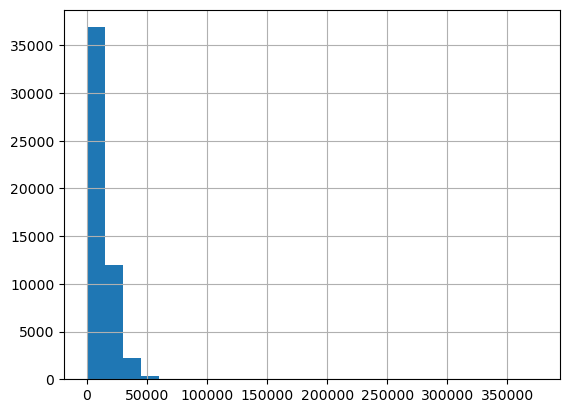

age


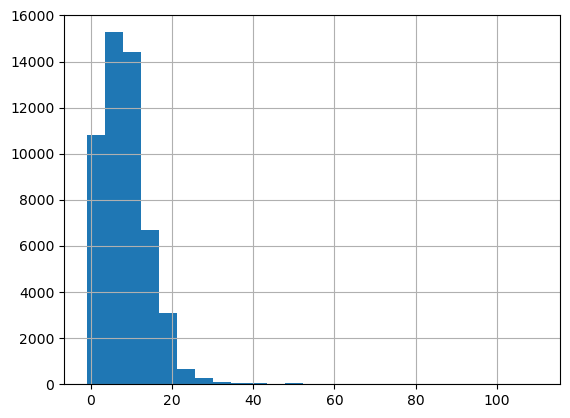

odometer


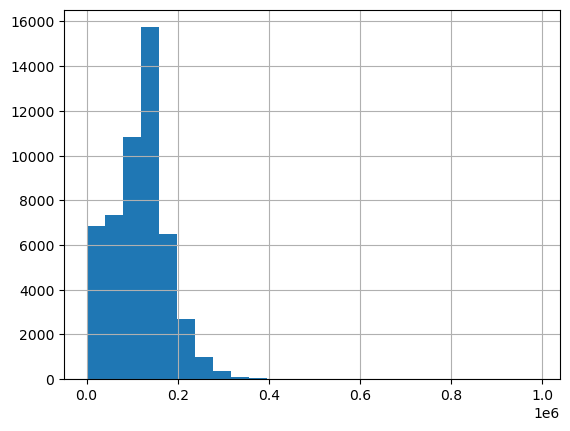

cylinders


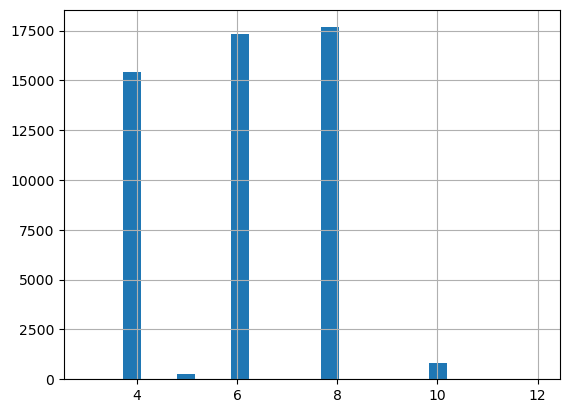

condition


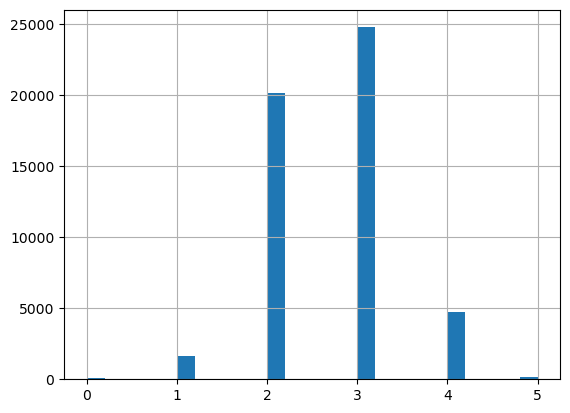

In [50]:
columns_to_check = ['price', 'age', 'odometer', 'cylinders', 'condition']

for column in columns_to_check :
    print(column)
    df[column].hist(bins=25)
    plt.show()


Dari histogram diatas, kolom `price`, `age`, dan `odomoter` terlihat memiliki outlier, dengan adanya rentang nilai yang besar namun masing-masing nilainya berjumlah sangat sedikit. Hal ini perlu diselidiki lebih lanjut dengan menggunakan grafik boxplot agar lebih mudah untuk menentukan outliernya. Namun sebelum itu, kolom `price`, dan `age` perlu dipelajari lebih dekat, sebab terdapat nilai `0` dan nilai negatif pada masing-masing kolom, dimana hal ini tidak wajar.

Grafik histogram kolom `price` untuk melihat distribusi nilai yang kecil (sekitar nilai `0`). 

Text(0, 0.5, 'Frekuensi')

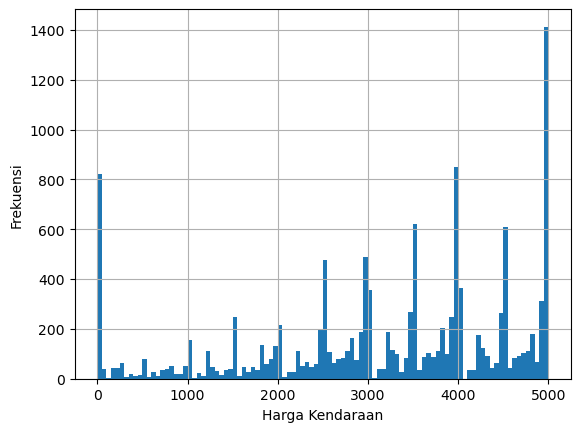

In [51]:
df['price'].hist(bins=100, range=(0,5000))
plt.xlabel('Harga Kendaraan')
plt.ylabel('Frekuensi')

Dari grafik diatas dapat dilihat terdapat rentang harga kendaraan yang sangat kecil, dari yang harganya hanya `1000` bahkan ada yang harganya `0`. Kemungkinan ini merupakan anomali data, oleh karena itu rentang nilai yang sangat kecil ini sebaiknya dihilangkan.

Selanjutnya memeriksa grafik histogram kolom `age` untuk melihat distribusi nilai yang kecil (nilai negatif).

Text(0, 0.5, 'Frekuensi')

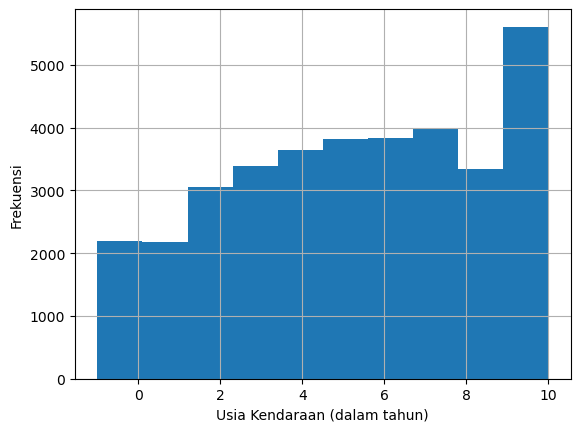

In [52]:
df['age'].hist(bins=10, range=(df['age'].min(),10))
plt.xlabel('Usia Kendaraan (dalam tahun)')
plt.ylabel('Frekuensi')

Terdapat usia kendaraan yang bernilai negatif (atau dibawah `0` tahun) dimana hal ini sangat tidak wajar. Anomali data ini (usia dibawah `0` tahun) juga perlu dihilangkan agar mendapat nilai data yang lebih akurat.

## Mempelajari dan Menangani Outlier

Dengan hasil di atas, terdapat tiga kolom yang mungkin berisi *outlier*, kolom : `price`, `age`, dan `odometer`. *Outlier* akan diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal pada grafik boxplot.

In [53]:
list_of_selected_column = ['price', 'age', 'odometer']

def upper_lower_whisker(column_name=column):
    Q1  = df_final[column_name].quantile(0.25)
    Q3  = df_final[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    print(column, lower_whisker, upper_whisker)
    return lower_whisker, upper_whisker

df_final = df.copy()

price


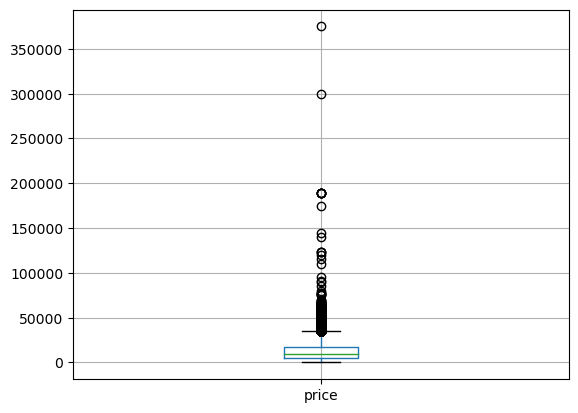

age


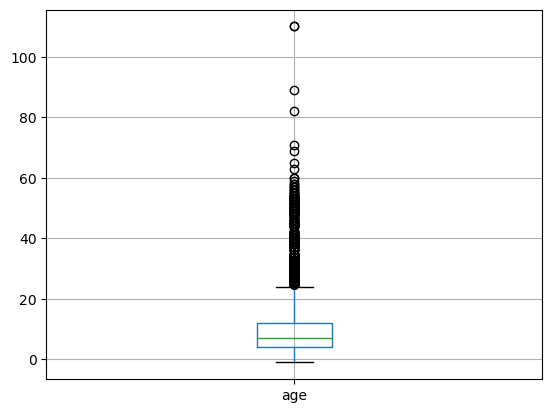

odometer


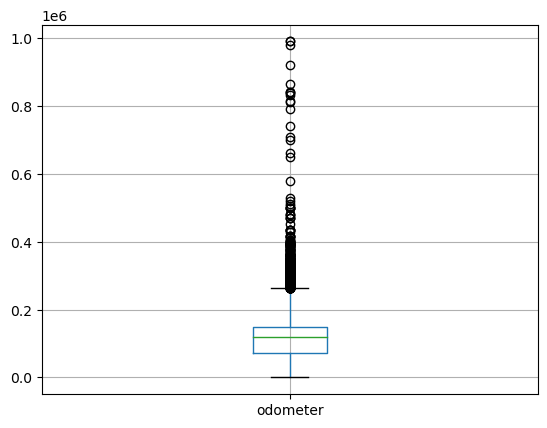

In [54]:
columns_to_check = ['price', 'age', 'odometer']

for column in columns_to_check :
    print(column)
    df_final.boxplot([column])
    plt.show()

Memfilter table data baru tanpa nilai outlier.

In [55]:
for column in list_of_selected_column:
    print('start cleaning outlier on', column)
    lower, upper = upper_lower_whisker(column_name=column)
    df_final = df_final[(df_final[column] < upper) & (df_final[column] > lower)]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on price
price -12758.5 34597.5
cleaning outlier on  price  was finished!
start cleaning outlier on age
age -8.0 24.0
cleaning outlier on  age  was finished!
start cleaning outlier on odometer
odometer -31362.5 258817.5
cleaning outlier on  odometer  was finished!


price


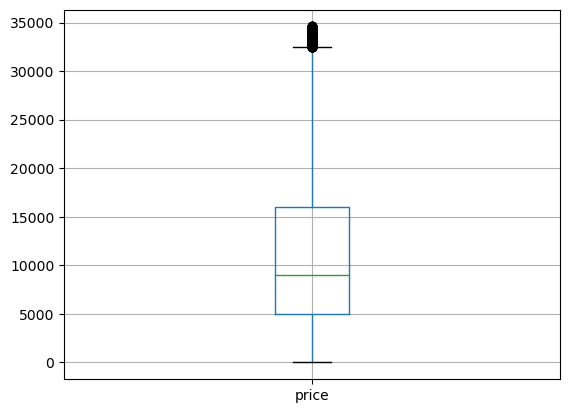

age


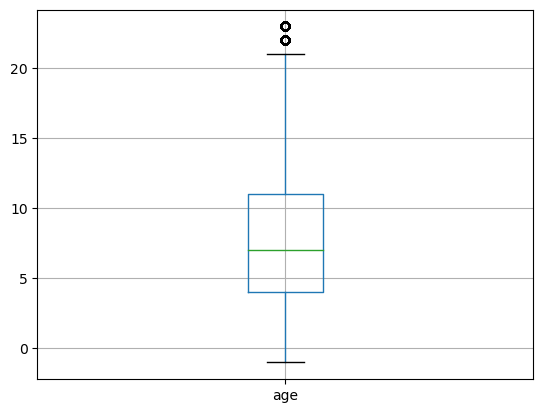

odometer


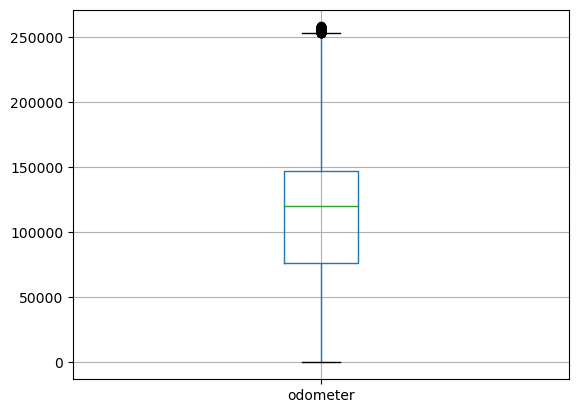

In [56]:
columns_to_check = ['price', 'age', 'odometer']

for column in columns_to_check :
    print(column)
    df_final.boxplot([column])
    plt.show()

Pada hasil filter pertama diatas, masih ditemukan adanya outlier pada kolom `price`, dan `odometer`. Untuk itu, akan dilakukan proses filter sekali lagi untuk menghilangkan outlier.

In [57]:
list_of_selected_column = ['price', 'odometer']

In [58]:
for column in list_of_selected_column:
    print('start cleaning outlier on', column)
    lower, upper = upper_lower_whisker(column_name=column)
    df_final = df_final[(df_final[column] < upper) & (df_final[column] > lower)]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on price
price -11486.5 32477.5
cleaning outlier on  price  was finished!
start cleaning outlier on odometer
odometer -28011.25 253210.75
cleaning outlier on  odometer  was finished!


price


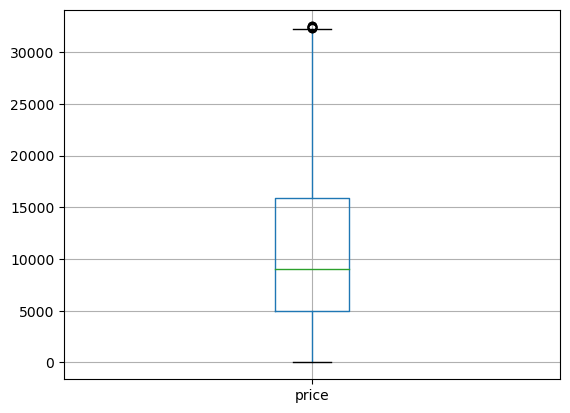

age


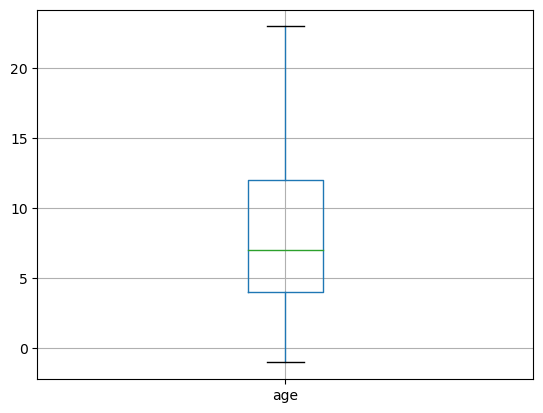

odometer


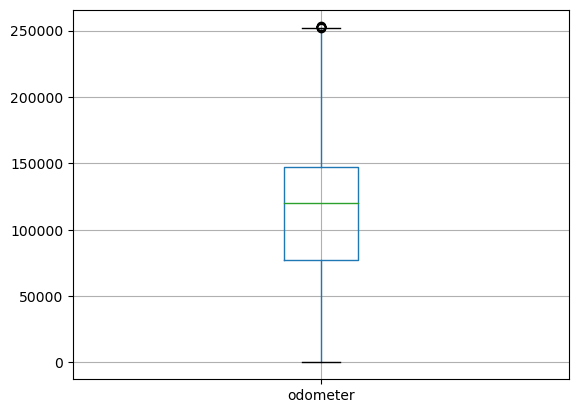

In [59]:
columns_to_check = ['price', 'age', 'odometer']

for column in columns_to_check :
    print(column)
    df_final.boxplot([column])
    plt.show()

Outlier sudah tidak ada, setelah dilakukan dua kali filter dengan menentukan batas bawah/atas untuk rentang nilai normal pada grafik boxplot.

Memeriksa informasi statistik dari table data baru.

In [60]:
df_final.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,odometer_per_year
count,47646.000000,47646.000000,47646.000000,47646.000000,47646.000000,47646.000000,47646.000000,47646.000000,47646.000000,47646.000000,47646.000000,47645.0
mean,11064.456093,2010.150338,2.635919,6.060320,114483.092558,0.481090,39.534777,3.001070,6.634723,2018.306301,8.155963,inf
std,7573.669175,4.997349,0.696502,1.675468,54076.251761,0.499648,28.191518,1.996192,3.471651,0.460961,5.010071,NaN
min,1.000000,1995.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,-1.000000,-136157.0
25%,4999.000000,2007.000000,2.000000,4.000000,77197.500000,0.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,10906.0
50%,8995.000000,2011.000000,3.000000,6.000000,119964.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,7.000000,15384.0
75%,15900.000000,2014.000000,3.000000,8.000000,147215.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,22621.0
max,32468.000000,2019.000000,5.000000,12.000000,253108.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,23.000000,inf


## Mempelajari Parameter Inti Tanpa Outlier

Membandingkan grafik data awal dan data yang telah difilter (yang tidak berisi *outlier*) dari masing-masing kolom.

price


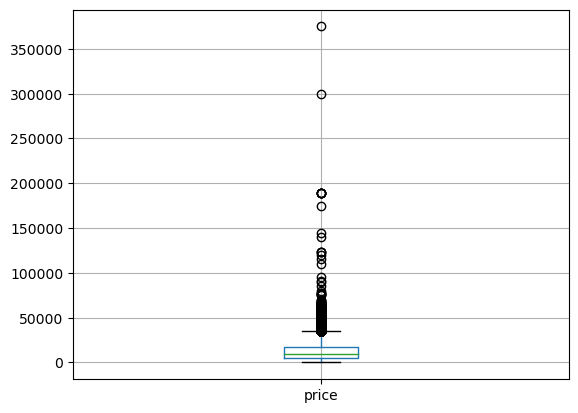

kolom price tanpa outlier


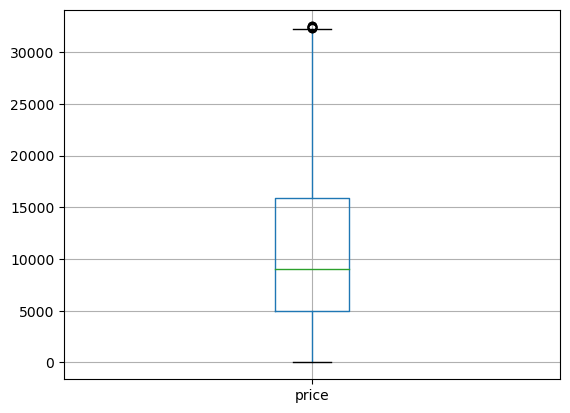

age


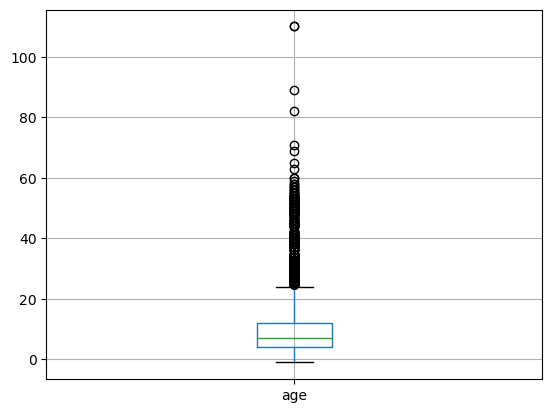

kolom age tanpa outlier


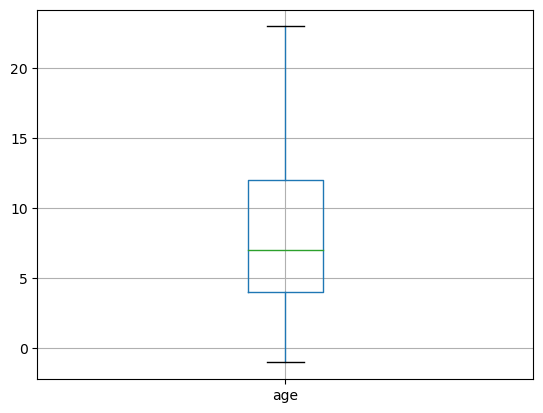

odometer


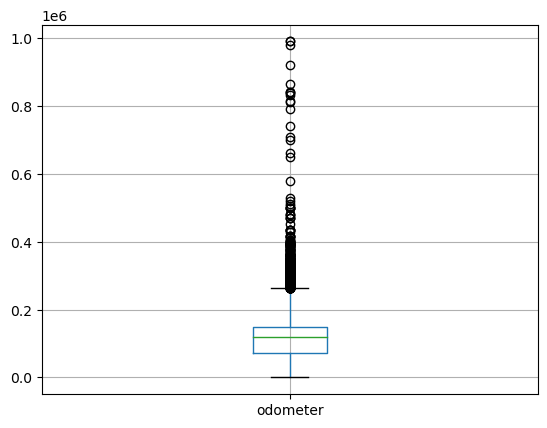

kolom odometer tanpa outlier


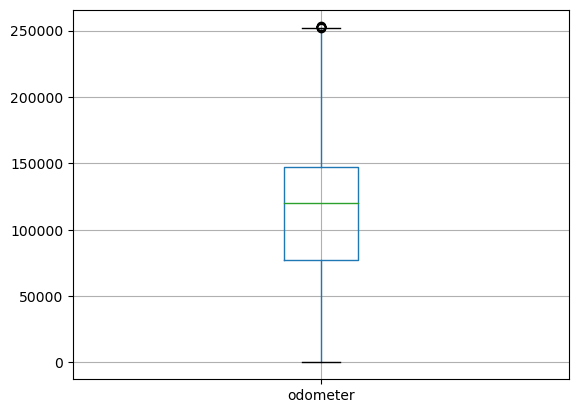

In [61]:
columns_to_check = ['price', 'age', 'odometer']

for column in columns_to_check :
    print(column)
    df.boxplot(column)
    plt.show()
    print('kolom', column, 'tanpa outlier')
    df_final.boxplot([column])
    plt.show()
    

Masing-masing grafik pada data yang telah difilter terlihat memiliki distribusi data yang normal dibandingkan grafik data lama, dengan rentang nilai yang tidak terlalu besar setelah outlier dihapus.

## Masa Berlaku Iklan 
Data statistik dan histogram dari kolom `days_listed` dibawah menunjukan rata-rata kendaraan diiklankan selama 39 hari dan dengan nilai mediannnya 33 hari. Dari data ini dapat dilihat juga bahwa iklan dihapus dengan cepat setelah 19 hari ditayangkan (atau kurang dari 19 hari), dimana ini merupakan 25% nilai dari data. Dan iklan ditayangkan dalam waktu yang sangat lama selama 53 hari atau lebih, dengan waktu terlama selama 271 hari.

count    47646.000000
mean        39.534777
std         28.191518
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

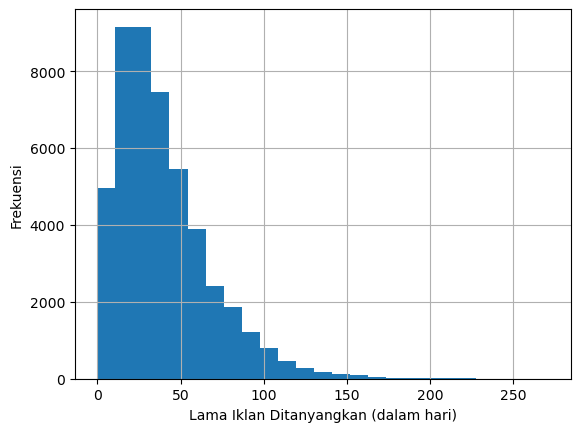

In [62]:
df_final['days_listed'].hist(bins=25)
plt.xlabel('Lama Iklan Ditanyangkan (dalam hari)')
plt.ylabel('Frekuensi')
df_final['days_listed'].describe()

## Harga Rata-Rata Setiap Jenis Kendaraan

Menganalisa jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan, dengan membuat grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. 

Dari grafik dibawah, `SUV` dan `sedan` merupakan dua jenis kendaraan dengan jumlah iklan yang paling banyak, dengan harga rata-ratanya 10307.02 dan 6984.94 masing-masing secara berurutan.

Axes(0.125,0.11;0.775x0.77)


,price
type,
SUV,10307.022878
sedan,6984.945233


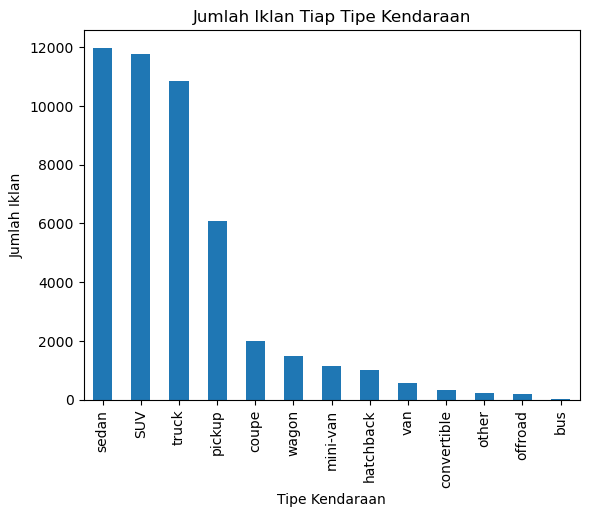

In [63]:
type_table = df_final.pivot_table(
    index='type', 
    values=['price', 'days_listed'], 
    aggfunc={'price':'mean', 'days_listed':'count'}
)

print(type_table['days_listed']
      .sort_values(ascending=False)
      .plot(kind='bar', xlabel='Tipe Kendaraan', ylabel='Jumlah Iklan', title='Jumlah Iklan Tiap Tipe Kendaraan')
     )

type_table[['price']].query('type == "SUV" | type == "sedan"')

## Faktor Harga

Mengidentifikasi faktor yang paling memengaruhi harga kendaraan menggunakan matriks korelasi dan plot korelasi. Sebelumnya, dua jenis kendaraan populer pada tahap sebelumnya dibuatkan table data baru terlebih dahulu, untuk menemukan apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, atau warnanya. 

Variabel kategorik (tipe transmisi, dan warna) akan dibuatkan grafik boxplot, sedangkan sisanya akan menggunakan scatterplot.

,age,condition,odometer,price
age,1.000000,-0.229113,0.571077,-0.525242
condition,-0.229113,1.000000,-0.234821,0.228271
odometer,0.571077,-0.234821,1.000000,-0.483124
price,-0.525242,0.228271,-0.483124,1.000000


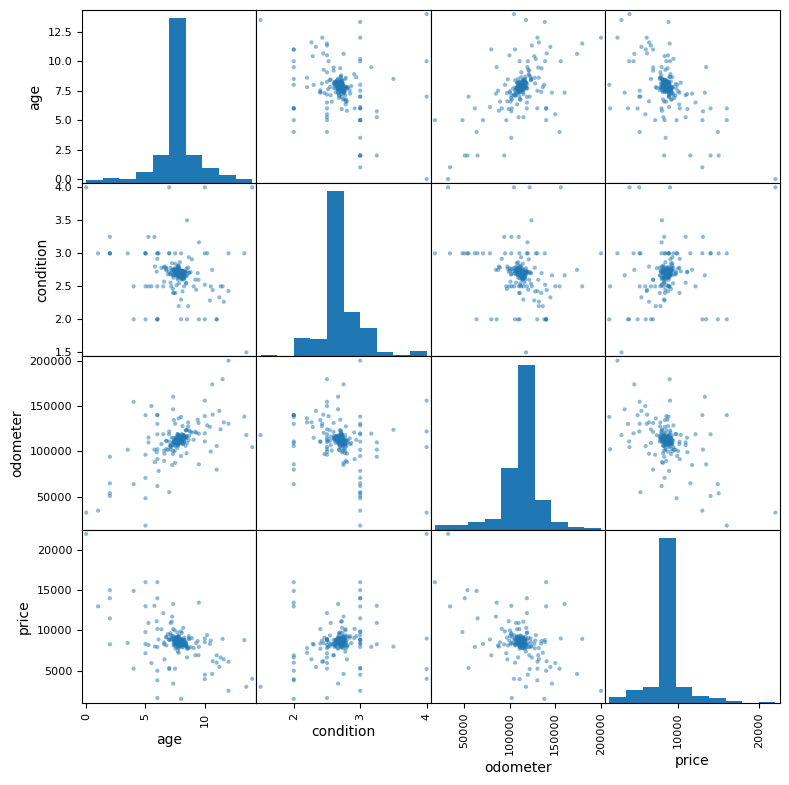

In [64]:
filtered = df_final.query('type == "SUV" | type == "sedan"')

pivot = filtered.pivot_table(index='days_listed', values=['price', 'age','odometer',  'condition'])
pd.plotting.scatter_matrix(pivot, figsize=(9, 9)) 
pivot.corr()

Dari hasil Korelasi Pearson diatas dapat disimpulkan usia kendaraan mempengaruhi harganya, dimana semakin tua usia kendaraan semakin murah harganya, dan juga sebaliknya (korelasi negatif dengan nilai -0.52). Hal ini juga ditunjukan dengan scatterplot pada matriks korelasinya.

Menganalisa ketergantungan harga kendaraan dan jenis transmisi menggunakan boxplot, dengan sebelumnya, memastikan tiap tipe transmisi memiliki setidaknya 50 iklan untuk dianalisa.

Dari hasil perhitungan dibawah tiap tipe transmisi memiliki jumlah iklan yang cukup untuk dianalisa.

In [65]:
filtered.groupby('transmission')['days_listed'].count()

transmission
automatic    22416
manual        1030
other          290
Name: days_listed, dtype: int64

automatic


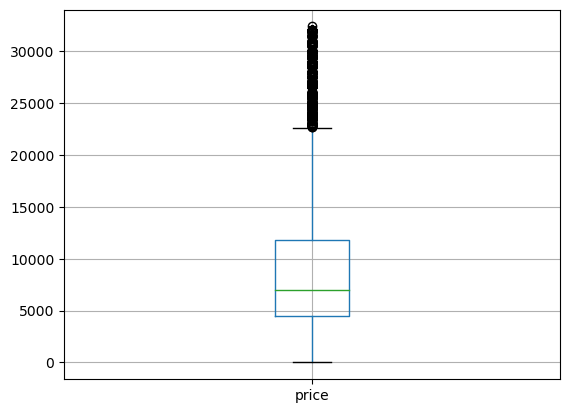

manual


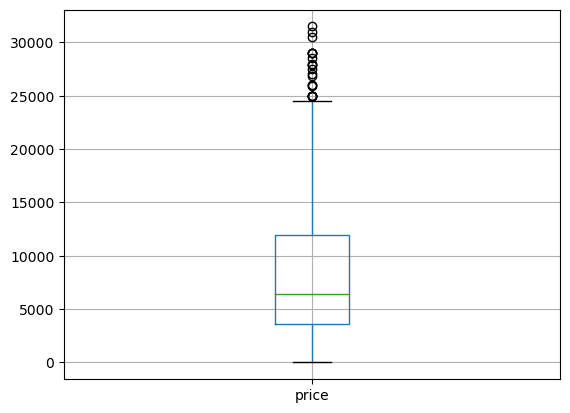

other


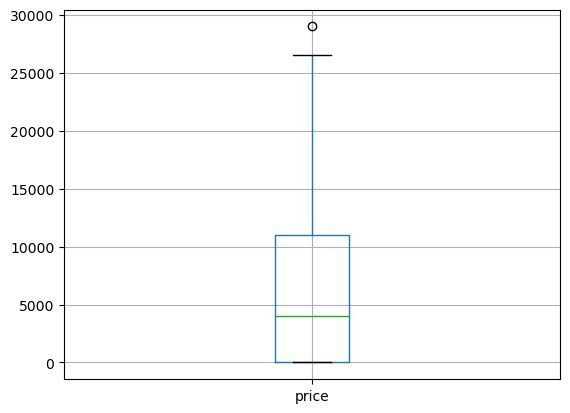

In [66]:
for trans in filtered['transmission'].unique():
    print(trans)
    filter_trans = filtered.loc[filtered['transmission'] == trans][['transmission', 'price']]
    filter_trans.boxplot()
    plt.show()

Dari grafik boxplot diatas, tipe transmisi mobil otomatis memiliki rentang harga yang lebih besar, banyak rentang harga kendaraan yang dihargai mulai dari 25000 keatas, dibandingkan dua tipe transmisi lainnya. Hal ini menyimpulkan bahwa mobil dengan tipe transmisi otomatis mempengaruhi harga kendaraan, dimana harganya akan cenderung lebih mahal dibandingkan tipe lainnya.

Menganalisa ketergantungan harga kendaraan dan warna kendaraan menggunakan boxplot, dengan sebelumnya, memastikan tiap warna kendaraan memiliki setidaknya 50 iklan untuk dianalisa.

Dari hasil perhitungan dibawah tiap warna kendaraan memiliki jumlah iklan yang cukup untuk dianalisa.

In [67]:
filtered.groupby('paint_color')['days_listed'].count().sort_values(ascending=False)

paint_color
unknown    4273
black      3811
silver     3545
white      3326
grey       2744
blue       2223
red        1798
green       607
brown       601
custom      592
orange       90
yellow       66
purple       60
Name: days_listed, dtype: int64

unknown


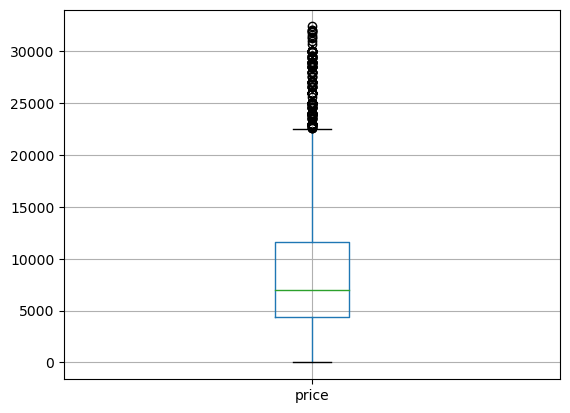

red


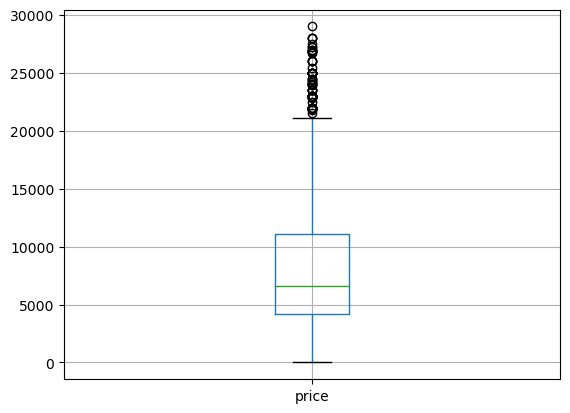

black


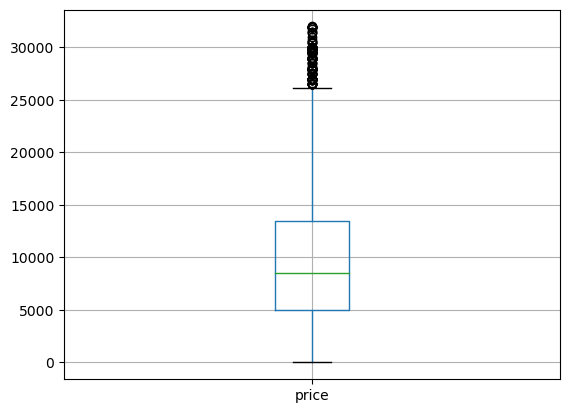

white


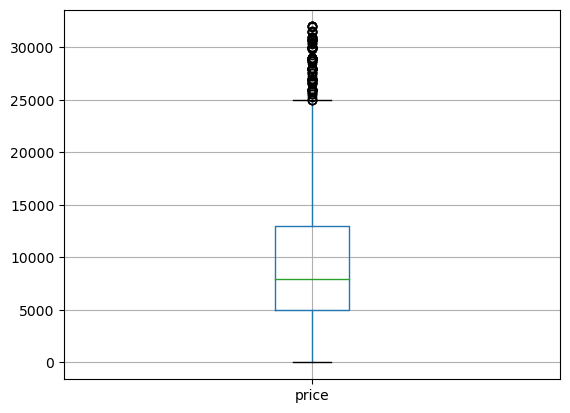

blue


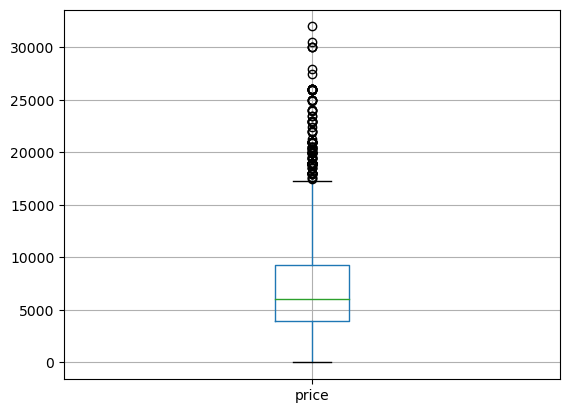

grey


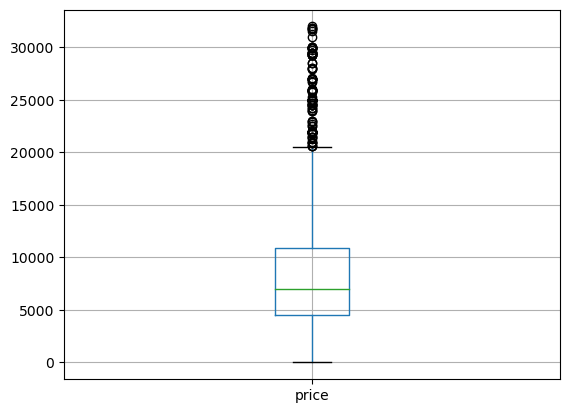

silver


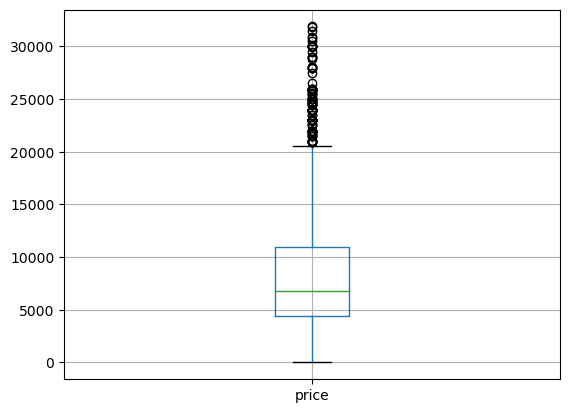

custom


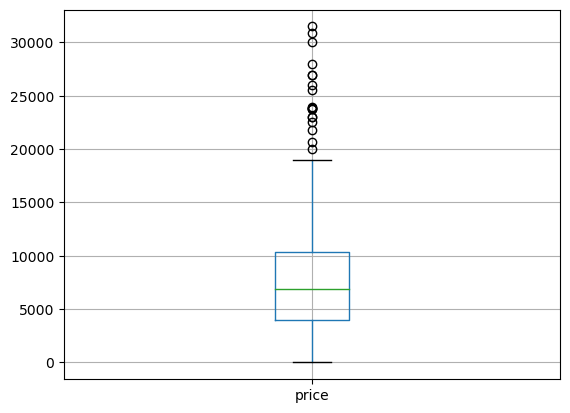

green


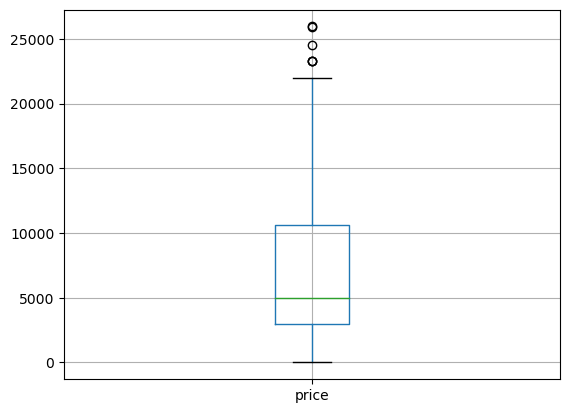

brown


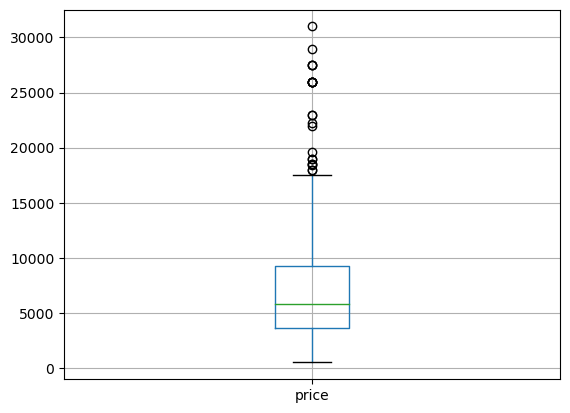

orange


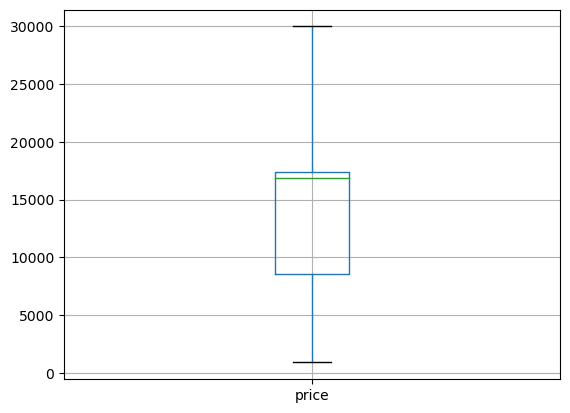

purple


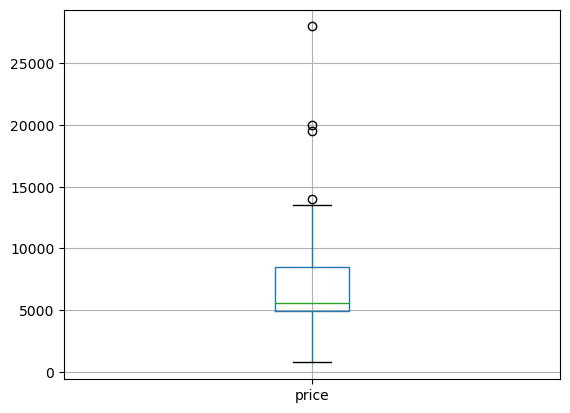

yellow


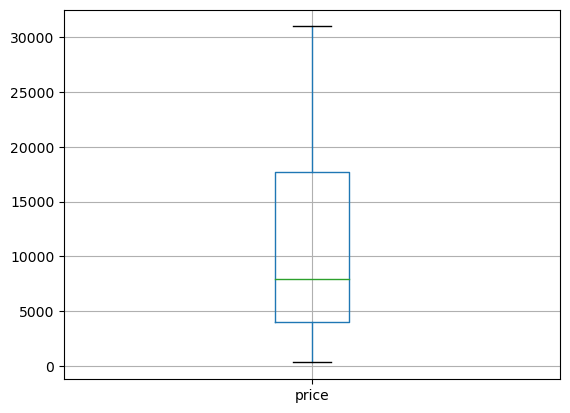

In [68]:
for col in filtered['paint_color'].unique():
    print(col)
    filter_col = filtered.loc[filtered['paint_color'] == col][['paint_color', 'price']]
    filter_col.boxplot()
    plt.show()

Dari grafik boxplot diatas, tiap warna kendaraan memiliki distribusi rentang harga yang relatif sama. Namun, warna-warna netral, yaitu hitam dan putih, memiliki jumlah distribusi rentang harga kendaraan lebih banyak, pada rentang yang dihargai mulai dari 25000 keatas, dibandingkan warna lainnya. Hal ini menyimpulkan bahwa mobil dengan warna hitam dan putih mempengaruhi harga kendaraan, dimana harganya akan cenderung lebih mahal dibandingkan warna lainnya.

## Kesimpulan Umum
Proyek ini bertujuan untuk menentukan faktor yang paling mempengaruhi harga kendaraan di Crankshaft List. Tahap awal pada proyek ini yaitu melakukan pra-premosesan data untuk menangani nilai yang hilang, dan memperbaki tipe serta kualitas data. 

Terdapat lima kolom dengan nilai yang hilang, dengan jumlah nilai yang hilang tidak simetris, dan berasal dari lima kolom dengan tipe data yang berbeda. Untuk menangani nilai yang hilang pada tiga kolom numerik, digunakan nilai mediannya dengan mengelompokan berdasarkan klasifikasi yang termirip dari masing-masing nilai yang hilang tersebut. Nilai median digunakan sebab ditemukan perbedaan yang cukup signikan antara hasil nilai mean dan median, dimana hal ini mengindikasikan bahwa terdapat outlier pada data yang memengaruhi nilai mean, sehingga dapat disimpulkan nilai median lebih akurat untuk digunakan. 

Selain kolom numerik, terdapat juga kolom dengan tipe data Boolean, yaitu kolom `is_4wd` yang memiliki nilai yang hilang. Untuk kolom Boolean ini, karena hanya memuat nilai-nilai True/False, maka nilai yang hilang dapat diisi dengan angka 0, sebab nilai True ditandai dengan angka 1. Dan kolom terkahir dengan nilai yang hilang yaitu kolom `paint_color`, yang merupakan kolom kategorik. Untuk menangani nilai hilang pada kolom ini digunakan string 'Unknown'.  

Selain menangani nilai yang hilang, pada pra-pemrosesan data ditemukan juga ada beberapa kolom dengan tipe data yang berbeda dengan tipe data yang seharusnya. Agar lebih sesuai untuk analisis yang diperlukan, kolom dengan data yang tidak sesuai : date_posted, model_year, dan is_4wd diperbaiki. Serta, untuk memperbaiki kualitas data, ditambahkan pula kolom waktu dalam minggu, bulan, dan tahun iklan ditayangkan, serta usia kendaraan ketika iklan ditayangkan, dan jarak tempuh rata-rata kendaraan per tahun.

Pada tahap awal analisa, dilakukan penanganan untuk outlier yang ditemukan pada kolom `price`, `age`, `cylinders`, dan `odometer`. Penentuan outlier ditentukan menggunakan grafik boxplot untuk menemukan batas outlier pada data, setelah itu nilai yang tergolong kedalam outlier dihapus. Dari data yang sudah dibersihkan ini, ditentukan jenis kendaraan dengan jumlah iklan terbanyak untuk menganalisa faktor yang memengaruhi harga kendaraan, dengan hasil sbb :

1. Usia kendaraan, Kondisi, dan Odometer  
Dari hasil Korelasi Pearson yang dilakukan pada tiga parameter sekaligus, `age`, `odometer`, dan `condition`, disimpulkan bahwa usia kendaraan merupakan faktor yang mempengaruhi harganya, dimana semakin tua usia kendaraan semakin murah harganya, dan juga sebaliknya. Sedangkan jarak tempuh kendaraan dan kondisinya tidak begitu memberikan pengaruh pada harga kendaraan.

2. Tipe Transmisi  
Dari grafik boxplot yang dipelajari berdasarkan tipe transmisi dan harga kendaraan, mobil dengan tipe transmisi otomatis memiliki rentang harga yang lebih besar, dibandingkan dua tipe transmisi lainnya. Hal ini menyimpulkan bahwa mobil dengan tipe transmisi otomatis mempengaruhi harga kendaraan, dimana harganya akan cenderung lebih mahal dibandingkan tipe lainnya.

3. Warna Kendaraan  
Pada grafik boxplot warna kendaraan, warna-warna netral, yaitu hitam dan putih, memiliki jumlah distribusi rentang harga kendaraan lebih banyak, pada rentang yang dihargai mulai dari 25000 keatas. Hal ini menyimpulkan bahwa mobil dengan warna hitam dan putih mempengaruhi harga kendaraan, dimana harganya akan cenderung lebih mahal dibandingkan warna lainnya.